<a href="https://colab.research.google.com/github/ZeeshanKazim/NeuralNetwork/blob/main/notebooks/01_EDA_new_algorithms_price_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
from google.colab import files
uploaded = files.upload()

Saving A.csv to A.csv
Saving ABRD.csv to ABRD.csv
Saving top_100_cryptos_with_correct_network.csv to top_100_cryptos_with_correct_network.csv


In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

plt.style.use("default")
pd.set_option("display.max_columns", 50)
pd.set_option("display.width", 140)


In [5]:
us = pd.read_csv("/content/A.csv")  # change name if your file is different
us["Date"] = pd.to_datetime(us["Date"])
us = us.sort_values("Date").reset_index(drop=True)
us["log_return"] = np.log(us["Adj Close"]).diff()

print("US daily (A) head:")
display(us.head())
print("US A – basic stats (Adj Close & log_return):")
display(us[["Adj Close", "log_return"]].describe())


US daily (A) head:


,Date,Open,High,Low,Close,Adj Close,Volume,log_return
0,1999-11-18,32.546494,35.765381,28.612303,31.473534,27.068665,62546300,NaN
1,1999-11-19,30.713520,30.758226,28.478184,28.880543,24.838577,15234100,-0.085979
2,1999-11-22,29.551144,31.473534,28.657009,31.473534,27.068665,6577800,0.085979
3,1999-11-23,30.400572,31.205294,28.612303,28.612303,24.607880,5975600,-0.095310
4,1999-11-24,28.701717,29.998211,28.612303,29.372318,25.261524,4843200,0.026216


US A – basic stats (Adj Close & log_return):


,Adj Close,log_return
count,5124.000000,5123.000000
mean,31.778674,0.000182
std,18.730529,0.027387
min,6.674886,-0.315926
25%,18.790381,-0.010486
50%,24.714866,0.000592
75%,39.203083,0.011337
max,97.816307,0.386773


In [6]:
moex = pd.read_csv("/content/ABRD.csv")  # or another MOEX file you uploaded
moex["time"] = pd.to_datetime(moex["time"])
moex = moex.sort_values("time").reset_index(drop=True)

print("MOEX intraday (ABRD) head:")
display(moex.head())
print("Period:", moex["time"].min(), "->", moex["time"].max())
print("Rows:", len(moex))


MOEX intraday (ABRD) head:


,time,open,close,high,low,value
0,2020-01-03 07:03:00+00:00,139.0,139.0,139.0,139.0,1
1,2020-01-03 07:08:00+00:00,139.0,139.0,139.0,139.0,1
2,2020-01-03 07:10:00+00:00,138.0,138.0,138.0,138.0,12
3,2020-01-03 07:11:00+00:00,138.0,138.0,138.0,138.0,1
4,2020-01-03 07:45:00+00:00,138.0,138.0,138.0,138.0,1


Period: 2020-01-03 07:03:00+00:00 -> 2024-08-19 20:39:00+00:00
Rows: 290065


In [7]:
def resample_intraday(df, rule="15T"):
    df = df.set_index("time")
    out = pd.DataFrame()
    out["open"] = df["open"].resample(rule).first()
    out["high"] = df["high"].resample(rule).max()
    out["low"] = df["low"].resample(rule).min()
    out["close"] = df["close"].resample(rule).last()
    out["value"] = df["value"].resample(rule).sum()
    out = out.dropna().reset_index()
    out["log_return"] = np.log(out["close"]).diff()
    return out

moex_15 = resample_intraday(moex)
print("MOEX 15 min bars:", len(moex_15))
display(moex_15.head())


MOEX 15 min bars: 41512


/tmp/ipython-input-394541000.py:4: FutureWarning: 'T' is deprecated and will be removed in a future version, please use 'min' instead.
  out["open"] = df["open"].resample(rule).first()
/tmp/ipython-input-394541000.py:5: FutureWarning: 'T' is deprecated and will be removed in a future version, please use 'min' instead.
  out["high"] = df["high"].resample(rule).max()
/tmp/ipython-input-394541000.py:6: FutureWarning: 'T' is deprecated and will be removed in a future version, please use 'min' instead.
  out["low"] = df["low"].resample(rule).min()
/tmp/ipython-input-394541000.py:7: FutureWarning: 'T' is deprecated and will be removed in a future version, please use 'min' instead.
  out["close"] = df["close"].resample(rule).last()
/tmp/ipython-input-394541000.py:8: FutureWarning: 'T' is deprecated and will be removed in a future version, please use 'min' instead.
  out["value"] = df["value"].resample(rule).sum()


,time,open,high,low,close,value,log_return
0,2020-01-03 07:00:00+00:00,139.0,139.0,138.0,138.0,15,NaN
1,2020-01-03 07:45:00+00:00,138.0,139.0,137.5,137.5,15,-0.00363
2,2020-01-03 08:00:00+00:00,139.0,139.0,139.0,139.0,1,0.01085
3,2020-01-03 08:15:00+00:00,137.5,137.5,137.5,137.5,3,-0.01085
4,2020-01-03 08:30:00+00:00,138.5,139.0,138.5,139.0,18,0.01085


In [8]:
crypto = pd.read_csv("/content/top_100_cryptos_with_correct_network.csv")
crypto["date"] = pd.to_datetime(crypto["date"])
crypto = crypto.sort_values(["symbol", "date"]).reset_index(drop=True)

print("Number of crypto symbols:", crypto["symbol"].nunique())
print("First 10 symbols:", crypto["symbol"].unique()[:10])


Number of crypto symbols: 100
First 10 symbols: ['ADAUSDT' 'ALGOUSDT' 'ANKRUSDT' 'ARDRUSDT' 'ARPAUSDT' 'ATOMUSDT'
 'BANDUSDT' 'BATUSDT' 'BCHUSDT' 'BNBUSDT']


In [9]:
btc_symbol = "BTCUSDT"  # change if needed to match your file
btc = crypto[crypto["symbol"] == btc_symbol].copy()
btc = btc.sort_values("date").reset_index(drop=True)
btc["log_return"] = np.log(btc["close"]).diff()

print(f"{btc_symbol} period:", btc["date"].min(), "->", btc["date"].max())
display(btc.head())


BTCUSDT period: 2018-08-01 00:00:00 -> 2025-08-05 00:00:00


,symbol,date,open,high,low,close,network,log_return
0,BTCUSDT,2018-08-01,7735.67,7750.00,7430.00,7604.58,Bitcoin,NaN
1,BTCUSDT,2018-08-02,7600.08,7709.46,7455.72,7525.71,Bitcoin,-0.010426
2,BTCUSDT,2018-08-03,7525.71,7540.00,7282.44,7418.78,Bitcoin,-0.014311
3,BTCUSDT,2018-08-04,7412.27,7494.81,6926.00,7009.84,Bitcoin,-0.056700
4,BTCUSDT,2018-08-05,7009.84,7089.87,6882.29,7024.19,Bitcoin,0.002045


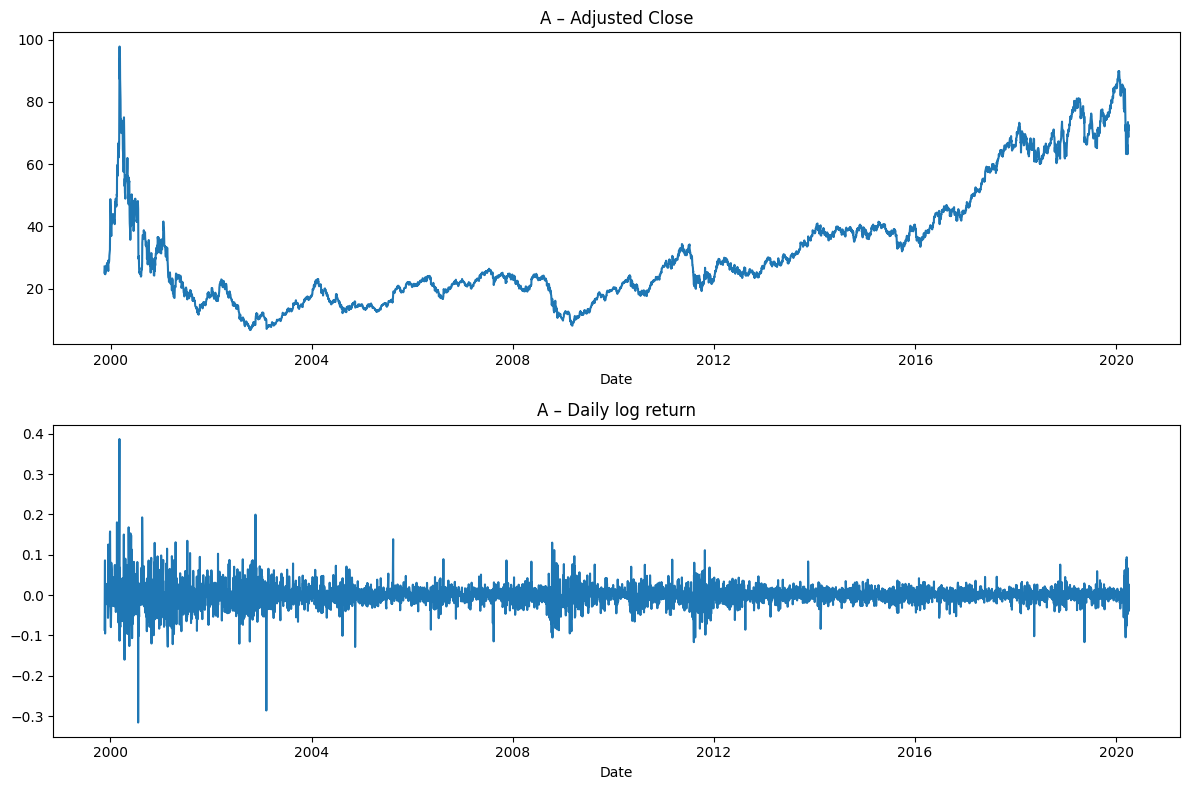

In [10]:
fig, axes = plt.subplots(2, 1, figsize=(12, 8))

axes[0].plot(us["Date"], us["Adj Close"])
axes[0].set_title("A – Adjusted Close")
axes[0].set_xlabel("Date")

axes[1].plot(us["Date"], us["log_return"])
axes[1].set_title("A – Daily log return")
axes[1].set_xlabel("Date")

fig.tight_layout()
plt.show()


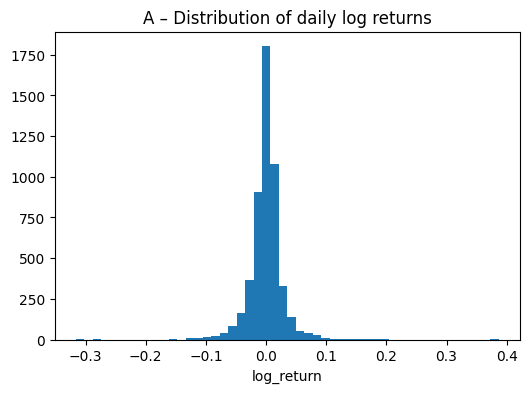

A – log return stats:


,log_return
count,5123.000000
mean,0.000182
std,0.027387
min,-0.315926
25%,-0.010486
50%,0.000592
75%,0.011337
max,0.386773


In [11]:
returns_A = us["log_return"].dropna()

plt.figure(figsize=(6,4))
plt.hist(returns_A, bins=50)
plt.title("A – Distribution of daily log returns")
plt.xlabel("log_return")
plt.show()

print("A – log return stats:")
display(returns_A.describe())


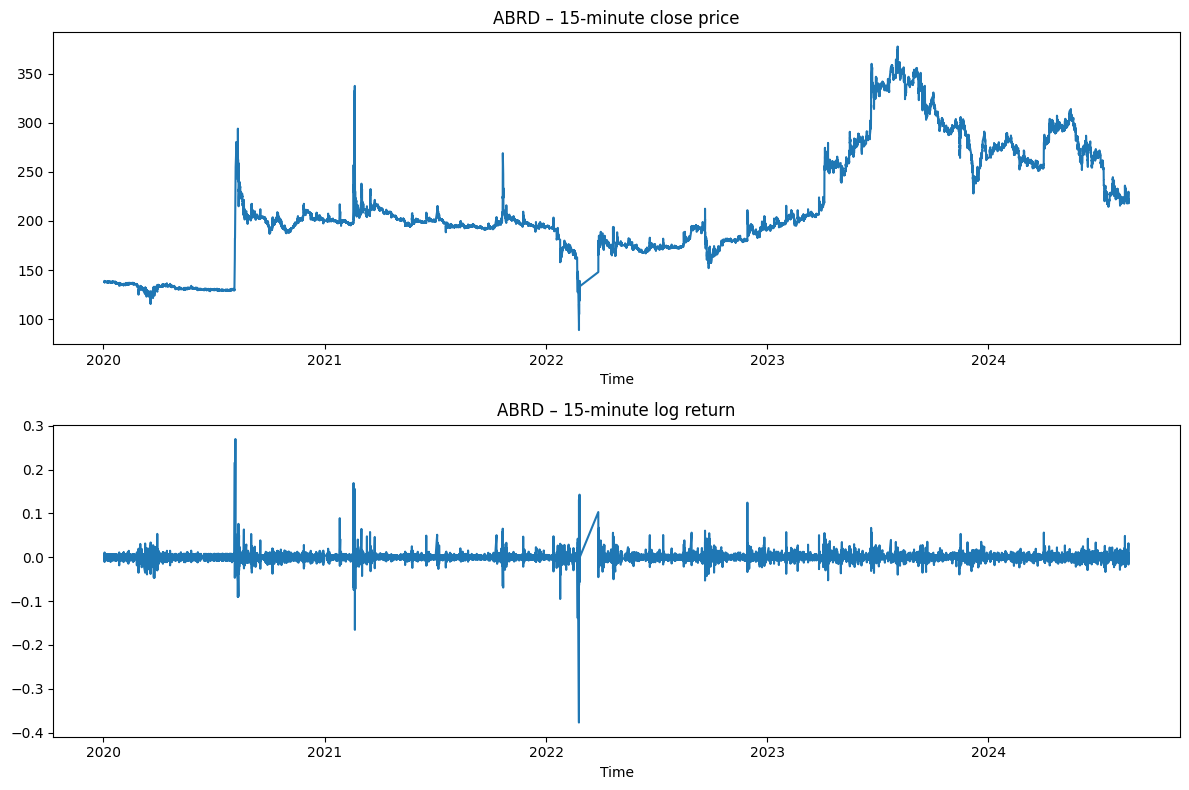

ABRD – 15m log return stats:


,log_return
count,41511.000000
mean,0.000011
std,0.006580
min,-0.377153
25%,-0.002484
50%,0.000000
75%,0.002454
max,0.269713


In [12]:
fig, axes = plt.subplots(2, 1, figsize=(12, 8))

axes[0].plot(moex_15["time"], moex_15["close"])
axes[0].set_title("ABRD – 15-minute close price")
axes[0].set_xlabel("Time")

axes[1].plot(moex_15["time"], moex_15["log_return"])
axes[1].set_title("ABRD – 15-minute log return")
axes[1].set_xlabel("Time")

fig.tight_layout()
plt.show()

print("ABRD – 15m log return stats:")
display(moex_15["log_return"].describe())


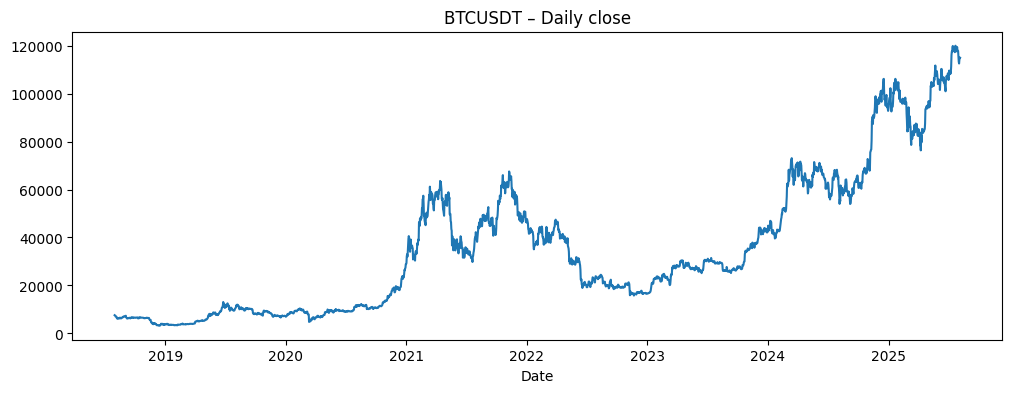

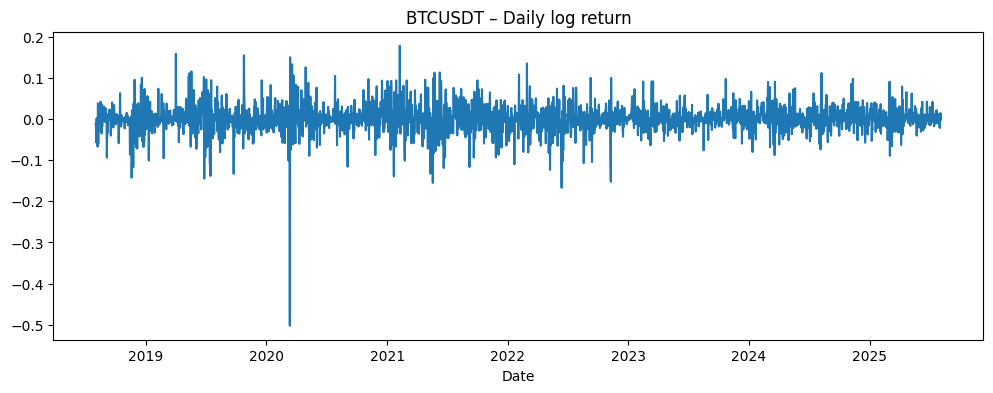

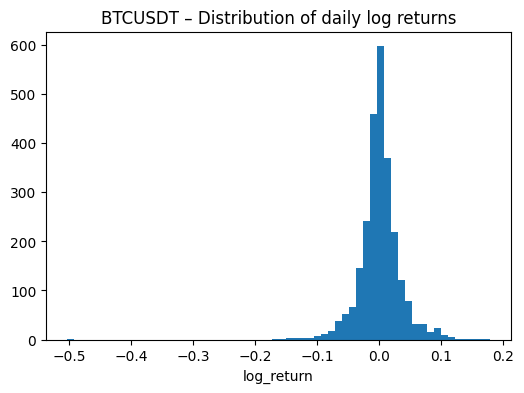

BTCUSDT – log return stats:


,log_return
count,2561.000000
mean,0.001060
std,0.034004
min,-0.502607
25%,-0.013005
50%,0.000708
75%,0.015328
max,0.178449


In [13]:
plt.figure(figsize=(12,4))
plt.plot(btc["date"], btc["close"])
plt.title(f"{btc_symbol} – Daily close")
plt.xlabel("Date")
plt.show()

plt.figure(figsize=(12,4))
plt.plot(btc["date"], btc["log_return"])
plt.title(f"{btc_symbol} – Daily log return")
plt.xlabel("Date")
plt.show()

plt.figure(figsize=(6,4))
plt.hist(btc["log_return"].dropna(), bins=60)
plt.title(f"{btc_symbol} – Distribution of daily log returns")
plt.xlabel("log_return")
plt.show()

print(f"{btc_symbol} – log return stats:")
display(btc["log_return"].describe())


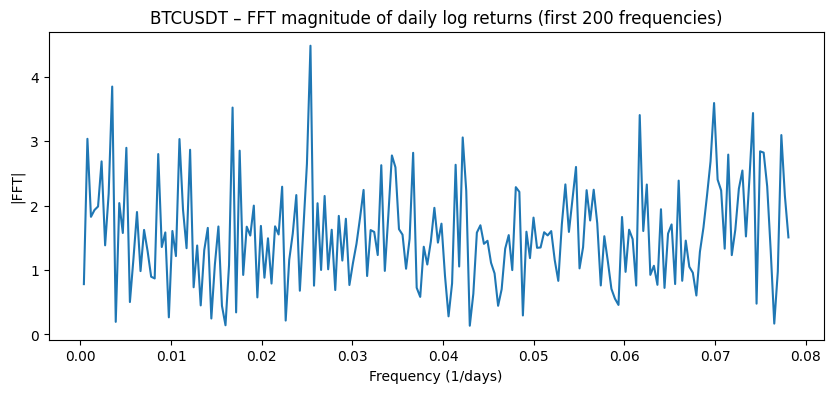

In [14]:
from numpy.fft import rfft, rfftfreq

series = btc["log_return"].dropna().values
n = len(series)
dt = 1.0  # 1 day between observations

fft_vals = rfft(series)
freqs = rfftfreq(n, d=dt)

mask = freqs > 0
freqs_pos = freqs[mask]
fft_pos = np.abs(fft_vals[mask])

plt.figure(figsize=(10,4))
plt.plot(freqs_pos[:200], fft_pos[:200])
plt.title(f"{btc_symbol} – FFT magnitude of daily log returns (first 200 frequencies)")
plt.xlabel("Frequency (1/days)")
plt.ylabel("|FFT|")
plt.show()


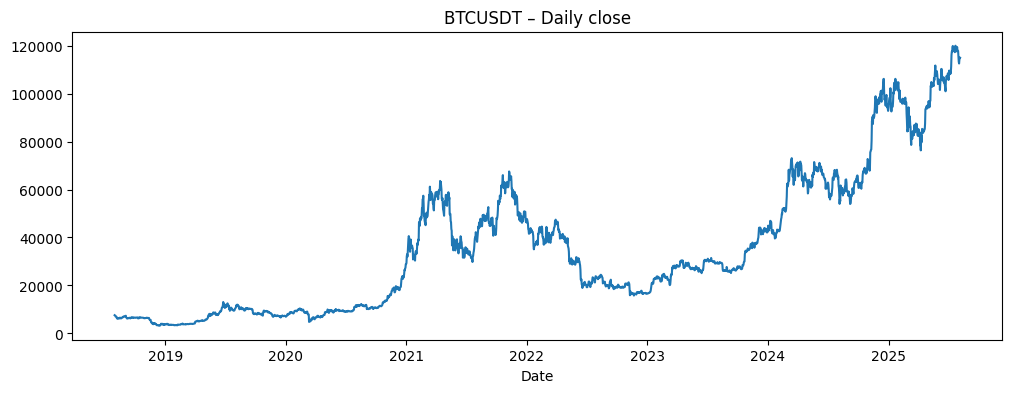

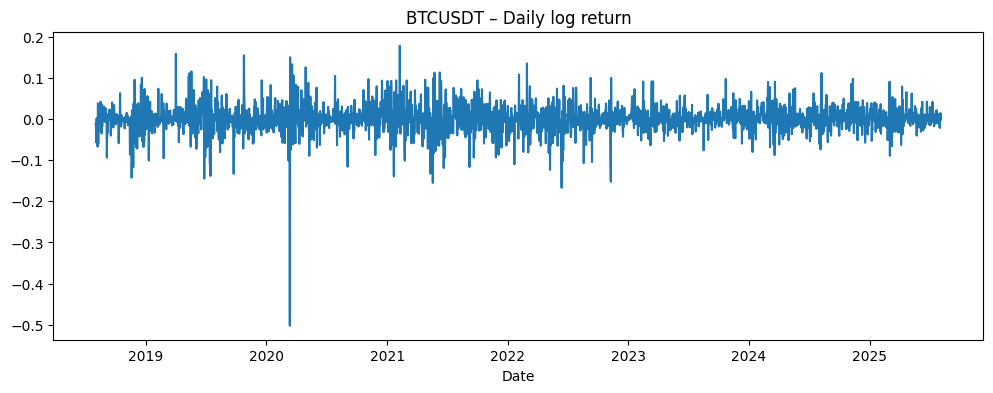

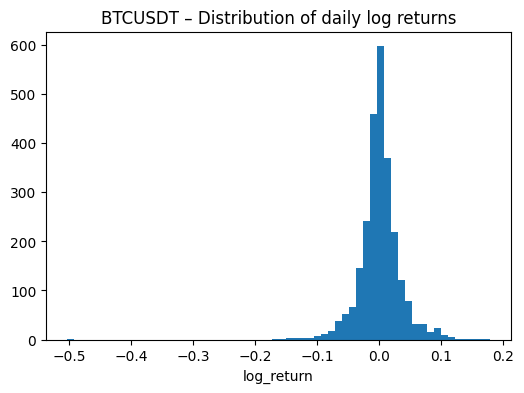

BTCUSDT – log return stats:


,log_return
count,2561.000000
mean,0.001060
std,0.034004
min,-0.502607
25%,-0.013005
50%,0.000708
75%,0.015328
max,0.178449


In [15]:
# BTC price and returns
plt.figure(figsize=(12,4))
plt.plot(btc["date"], btc["close"])
plt.title("BTCUSDT – Daily close")
plt.xlabel("Date")
plt.show()

plt.figure(figsize=(12,4))
plt.plot(btc["date"], btc["log_return"])
plt.title("BTCUSDT – Daily log return")
plt.xlabel("Date")
plt.show()

plt.figure(figsize=(6,4))
plt.hist(btc["log_return"].dropna(), bins=60)
plt.title("BTCUSDT – Distribution of daily log returns")
plt.xlabel("log_return")
plt.show()

print("BTCUSDT – log return stats:")
display(btc["log_return"].describe())


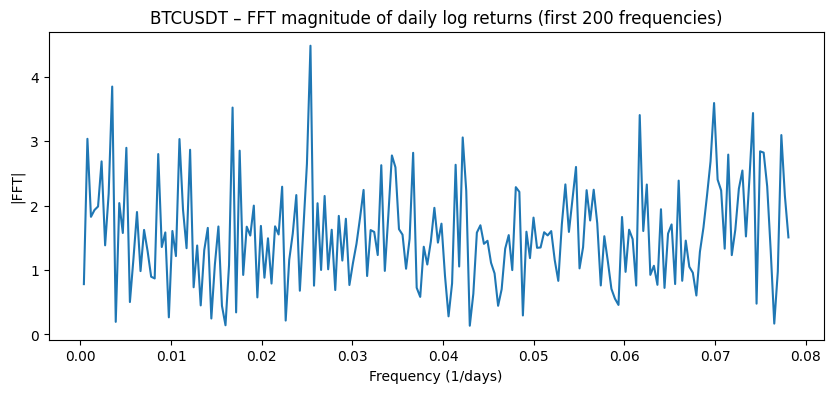

In [16]:
from numpy.fft import rfft, rfftfreq

series = btc["log_return"].dropna().values
n = len(series)
dt = 1.0  # 1 day

fft_vals = rfft(series)
freqs = rfftfreq(n, d=dt)

mask = freqs > 0
freqs_pos = freqs[mask]
fft_pos = np.abs(fft_vals[mask])

plt.figure(figsize=(10,4))
plt.plot(freqs_pos[:200], fft_pos[:200])
plt.title("BTCUSDT – FFT magnitude of daily log returns (first 200 frequencies)")
plt.xlabel("Frequency (1/days)")
plt.ylabel("|FFT|")
plt.show()


In [18]:
def resample_intraday(df, rule="15min"):
    df = df.set_index("time")
    out = pd.DataFrame()
    out["open"] = df["open"].resample(rule).first()
    out["high"] = df["high"].resample(rule).max()
    out["low"] = df["low"].resample(rule).min()
    out["close"] = df["close"].resample(rule).last()
    out["value"] = df["value"].resample(rule).sum()
    out = out.dropna().reset_index()
    out["log_return"] = np.log(out["close"]).diff()
    return out
